In [1]:
%matplotlib inline

### Zhiqi: I renamed your file to zhiqi.tif:

In [2]:
!ls imagery/zhiqi -l

insgesamt 4684
-rw-rw-r-- 1 mort mort  496505 Apr 22 17:13 5bands-fullarea.tif
-rw-rw-r-- 1 mort mort  160464 Apr 21 16:08 python-errors1.png
-rw-rw-r-- 1 mort mort  159087 Apr 21 16:08 python-errors2.png
-rw-rw-r-- 1 mort mort  356436 Apr 22 13:13 zhiqi_em.tif
-rw-rw-r-- 1 mort mort 3606385 Apr 21 16:08 zhiqi.tif
-rw-rw-r-- 1 mort mort    1691 Apr 21 16:10 zhiqi.tif.aux.xml


In [33]:
!gdalinfo -stats imagery/zhiqi/zhiqi.tif

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Driver: GTiff/GeoTIFF
Files: imagery/zhiqi/zhiqi.tif
       imagery/zhiqi/zhiqi.tif.aux.xml
Size is 297, 1198
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 44N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 44N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",81,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale fa

### Here is an RGB plot of bands 3,4,5:

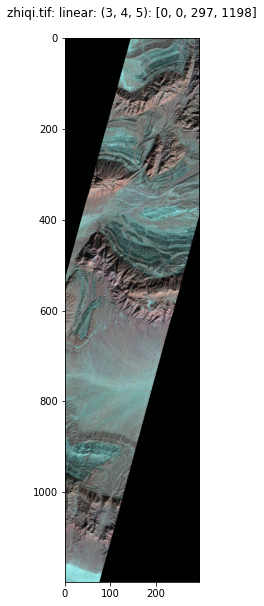

<Figure size 432x288 with 0 Axes>

In [35]:
%run scripts/dispms -f imagery/zhiqi/zhiqi.tif -e 2 -p [3,4,5] 

### The emnew.py code adds gaussian noise to the zero-valued edge pixels. They cause the algorithm interpret the edge pixels as a compact cluster:

In [3]:
%run scripts/em  -K 4 -M 2 -n 0 imagery/zhiqi/5bands-fullarea.tif

--------------------------
     EM clustering
--------------------------
infile:   imagery/zhiqi/5bands-fullarea.tif
clusters: 4
T0:       0.500000
beta:     0.500000
scale:    2
running EM on 2856 pixel vectors
em iteration 0: dU: 0.806712 loglike: -4456.930251
em iteration 10: dU: 0.766466 loglike: -1358.538771
em iteration 20: dU: 0.736381 loglike: -696.890090
em iteration 30: dU: 0.395426 loglike: -533.850896
em iteration 40: dU: 0.262082 loglike: -523.406422
running EM on 11424 pixel vectors
em iteration 0: dU: 0.969195 loglike: -5211.679522
running EM on 45696 pixel vectors
em iteration 0: dU: 0.970456 loglike: -16978.914601
Cluster mean vectors
[[2191.96662889 2179.75742644 2152.63546215 1821.54587387 1798.2665757 ]
 [2960.59839065 2897.26748227 2891.11133118 1625.67551897 1567.55071459]
 [3709.73264475 3649.24807493 3592.65432424 2771.88259882 2783.27827212]
 [4040.19647131 3896.14951192 3834.63869689 2223.78186    2338.65880852]]
Cluster covariance matrices
cluster: 0
[[457388

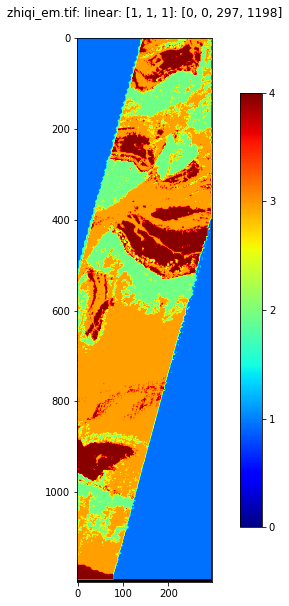

<Figure size 432x288 with 0 Axes>

In [4]:
%run scripts/dispms -f imagery/zhiqi/zhiqi_em.tif -c

In [5]:
%run scripts/em -h

            
Usage: 
--------------------------------------

Perform Gaussian mixture clustering on multispectral imagery 

python scripts/em.py [OPTIONS] filename

Options:
  -h            this help
  -p  <list>    band positions e.g. -p [1,2,3,4,5,7]
  -d  <list>    spatial subset [x,y,width,height] 
                              e.g. -d [0,0,200,200]
  -K  <int>     number of clusters (default 6)
  -M  <int>     maximum scale (default 2)
  -m  <int>     minimum scale (default 0) 
  -n  <int>     add Gaussian noise to pixel value (default None)
  -t  <float>   initial annealing temperature (default 0.5)
  -s  <float>   spatial mixing factor (default 0.5)  
  -P            generate class probabilities image 
  
If the input file is named 

         path/filenbasename.ext then

The output classification file is named 

         path/filebasename_em.ext

and the class probabilities output file is named

         path/filebasename_emprobs.ext
  
  -------------------------------------
